#          Loan Approval Prediction System

Before Starting with the projet the first question that comes to our mind is why do we need this system which I will be explaining in the further steps?

###  INTRODUCTION
Since the cost of assets are increasing on a daily basis, a large capital is required to purchase a complete asset. It is the reason it is not possible for most of the population to purchase a asset from their savings alone.

To resolve this, the straightforward way is to meet the funding requirement by applying a loan. However the loan application passes through a number of different stages to check the creditworthiness of the applicant. Also since the number of loan applicants are too high it makes the loan approval a lengthy process and it is still not sure whether the application will be approved or not.


### OBJECTIVE
The aim of this Paper is to provide quick, immediate and easy way to choose the deserving applicants. 
Through this system we can predict whether that particular applicant is safe or not and the whole process of validation of features is automated by machine learning technique. 

It can provide special advantages to the bank. The Loan Prediction System can automatically calculate the weight of each features taking part in loan processing and on new test data same features are processed with respect to their associated weight. 

A time limit can be set for the applicant to check whether his/her loan can be sanctioned or not. 


### Data Mining
We will be using data mining which is the core of knowlege discovery process. Data mining is a data analysis method that extracts valuable and productive insights from raw data. 

Classification is the most commonly applied data mining technique, which employs a set of pre-classified examples to develop a model that can classify the population of records at large.

Data mining is widely used for managing risks in the banking industry like offering new customers credit cards, extending existing customers’ lines of credit, and approving loans.

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples.


### RESEARCH METHODOLOGY

Steps used in our Model building are:

1)Loading the data

2)Understanding the data

3)Missing value treatment

4)Exploratory Data Analysis (EDA)

     i)Univariate Analysis
     ii)Bivariate Analysis
        
5)Data Normalization.

6)Encoding the categorical data

7)Train and test data split

8)Model Building using different classification algorithm

9)Selection of the best Model 

10)Making predictions


In [201]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


# Loading of dataset
Our first step before starting the Loan Prediction project is to read the dataset in python. 

The data is sourced from Kaggle - https://www.kaggle.com/code/ajaymanwani/loan-approval-prediction/data

In [202]:
data = pd.read_csv("C:\\Users\\Asus\\OneDrive\\Desktop\\sample datasets\\research project\\dataset loan approval\\loan-train.csv")
data.head()    # head of the data 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Understanding the dataset
In this section, we’ll check the data structure of the loan dataset, and then we’ll check the features and its datatypes.
Our loan dataset consists of 614 rows and 13 columns out of which there are 12 independent variables and one target variable which is loan status. The details of each of the variable from the dataset is explained below:


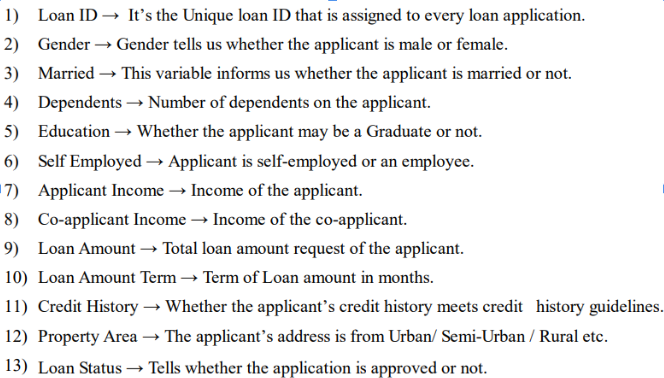

In [203]:
# To check the shape of the data
print(data.shape) 

(614, 13)


In [204]:
data.describe() # only for numerical values

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Missing Value Treatment
Missing value treatment is one of the most important steps in the data pre-processing.
It includes identifying missing value and treating them in a way that minimum amount of information is lost.
To replace categorical data we will use the Mode function.
In case of numerical data we will use the mean function.


In [205]:
data.info()  # To check if our dataset has Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [206]:
 # To count the missing values in data
data.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [207]:
# Dealing with null categorical values
# For categorical missing data we will replace them using the mode function

cols = data[["Gender","Married","Dependents","Self_Employed","Credit_History"]]
for i in cols:
    data[i].fillna(data[i].mode().iloc[0],inplace = True)

In [208]:
# Dealing with null numerical values
# For numerical missing data we will replace them using the mean function

cols1 = data[["LoanAmount","Loan_Amount_Term"]]
for i in cols1:
    data[i].fillna(data[i].mean(axis = 0),inplace = True)

In [209]:
# To check the count of missing value after missing  value treatment
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

From the above table we can conclude that there are no remaining missing value in our dataset.

Since Loan Id column is irrelevant as it only act as a serial number for loan application, we will drop this column.

In [210]:
data.drop(["Loan_ID"],axis = 1, inplace = True)

In [211]:
data.head()  # Dataset after dropping Loan ID

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Exploratory Data Analysis
EDA is used to analyze, investigate data sets and summarize their main characteristics, often employing data visualization methods. It is of three types - univariate , bivariate and multivariate analysis. We will be using the first two methods in this project.

## Univariate Analysis
In Univariate analysis we visualize and derive useful insights from each variable separately.


### 1. Loan status
First let us start our univariate analysis from our target variable - loan status.

In [212]:
print("The total number of applicants or size of target variable are :", data["Loan_Status"].count())
print("Number of approved and rejected loans are :\n\n" , data["Loan_Status"].value_counts())

The total number of applicants or size of target variable are : 614
Number of approved and rejected loans are :

 Y    422
N    192
Name: Loan_Status, dtype: int64


In [213]:
# percentage of loan status whether approved or not
data["Loan_Status"].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

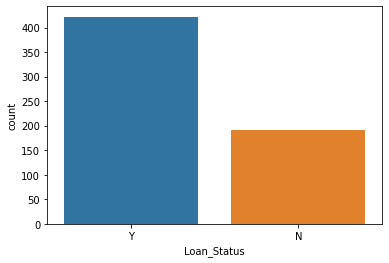

In [214]:
# loan approved or rejected percentage
sns.countplot(x = data['Loan_Status'])

It is our target variable. In our dataset 422 loans are approved out of 614 entries. It represents that approx. 70% of the loan requests are approved.

### 2. Gender


In [215]:
# Value count
print("Total gender distribution :\n\n" , data["Gender"].value_counts())

Total gender distribution :

 Male      502
Female    112
Name: Gender, dtype: int64


In [216]:
# Percentage of gender 
data['Gender'].value_counts(normalize=True)*100

Male      81.758958
Female    18.241042
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

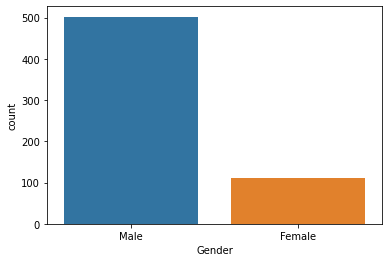

In [217]:
sns.countplot(x = data['Gender'])

As per our dataset the number of male applicants is 502 and for females it is only 112. This shows that most of the applicants are male and it is equivalent to approximately 82% of the data. It also shows that our data is biased.


### 3. Married

In [218]:
print("Total Marriage distribution :\n\n" , data["Married"].value_counts())

Total Marriage distribution :

 Yes    401
No     213
Name: Married, dtype: int64


In [219]:
# Percentage of Marriage
data['Married'].value_counts(normalize=True)*100

Yes    65.309446
No     34.690554
Name: Married, dtype: float64

<AxesSubplot:xlabel='Married', ylabel='count'>

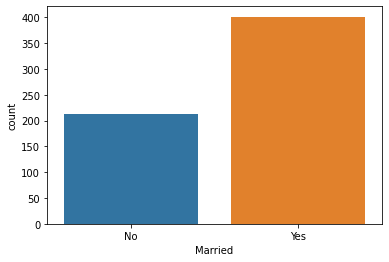

In [220]:
sns.countplot(x = data['Married'])

From the Married plot we can conclude that most of the applicants are married which relates to around 65% of our data.


### 4. Dependents

In [221]:
print("Dependents ratio :\n\n" , data["Dependents"].value_counts())

Dependents ratio :

 0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [222]:
# Percentage of Dependents
data['Dependents'].value_counts(normalize=True)*100

0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

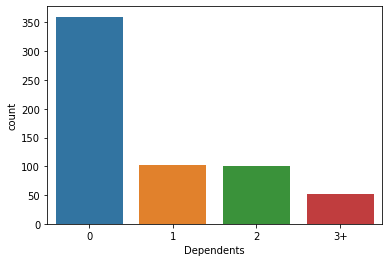

In [223]:
sns.countplot(x = data['Dependents'])

As we can see most of the applicants have zero dependents and very few applicants have 3 or more than three dependents.


### 5. Education

In [224]:
print("Education ratio :\n\n" , data["Education"].value_counts())

Education ratio :

 Graduate        480
Not Graduate    134
Name: Education, dtype: int64


In [225]:
# Percentage of Education
data['Education'].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='count'>

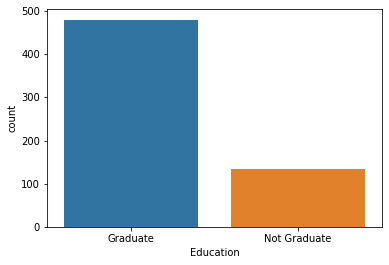

In [226]:
sns.countplot(x = data['Education'])

480 applicants are graduates and the remaining are not.
It is around 80% of our total data.


### 6. Self-Employed

In [227]:
print("Self Employed or not ratio :\n\n" , data["Self_Employed"].value_counts())

Self Employed or not ratio :

 No     532
Yes     82
Name: Self_Employed, dtype: int64


In [228]:
# Percentage
data['Self_Employed'].value_counts(normalize=True)*100

No     86.644951
Yes    13.355049
Name: Self_Employed, dtype: float64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

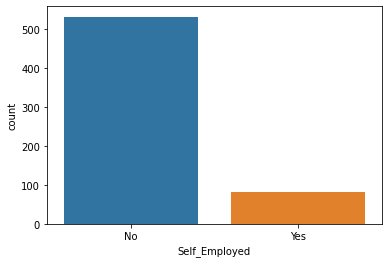

In [229]:
sns.countplot(x = data['Self_Employed'])

Only 82 applicants are self-employed which is around 13% of our dataset and the other applicants are either employees or not employed.

### 7. Credit History

In [230]:
data["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [231]:
data['Credit_History'].value_counts(normalize=True)*100

1.0    85.504886
0.0    14.495114
Name: Credit_History, dtype: float64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

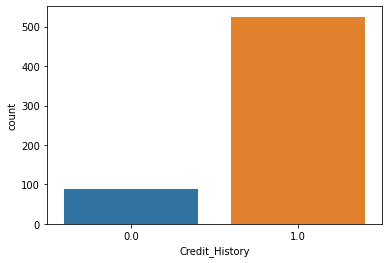

In [232]:
sns.countplot(x = data['Credit_History'])

Credit history represents whether the applicant has done any previous default. From the bar graph, we can check that most of the applicants have a good credit history. We can see that around 86% of applicants have repaid their previous debts.

### 8. Property Area

In [233]:
data["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [234]:
data["Property_Area"].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

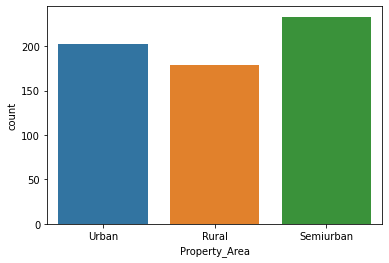

In [235]:
sns.countplot(x = data['Property_Area'])

From the above plot, we can see that maximum number of applicants are from SemiUrban but the difference is not high.

### 9. Applicant Income 
Since the applicant Income is a categorical column, we will use the histogram or boxplots for our analysis.

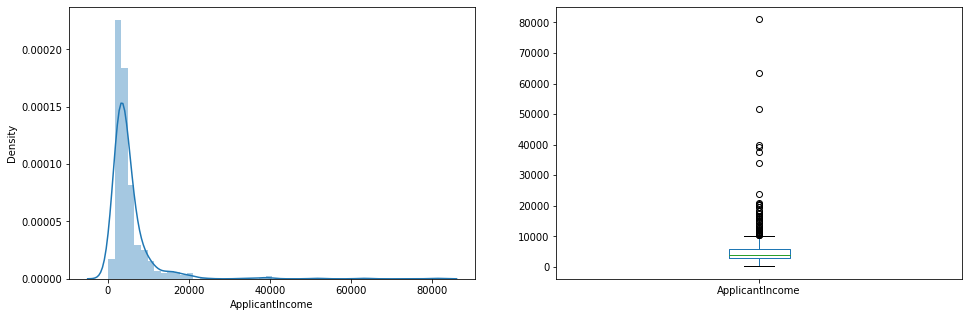

In [236]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data["ApplicantIncome"]);

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()


From the above plots we can see that the distribution of the applicant income is on the left, which is also known as right skewed and the data is not normally distributed. It's because the dataset contains outliers or we can say extreme values.

The outliers in the data might be showing since we are looking at applicants with different education levels. Let us try to segregate them by education level.

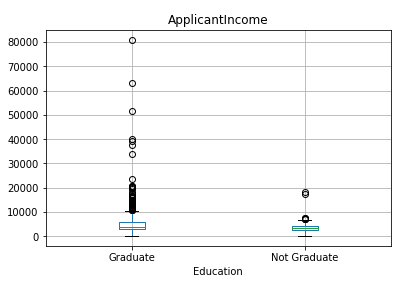

In [237]:
data.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

From the above fissure of boxplot, we can conclude that majority of the outliers are applicants who are graduates and very outliers are present in the non-graduate section. In this case we do not need to remove the outliers, we can simply normalize the income.


### 10. Co-Applicant Income distribution

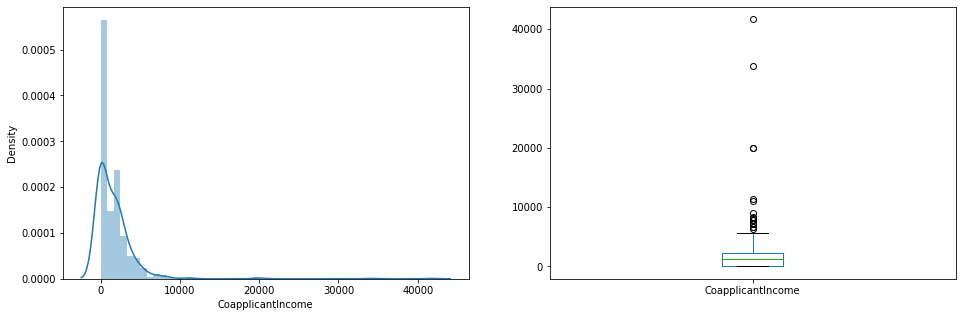

In [238]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data["CoapplicantIncome"]);

plt.subplot(122)
data["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Similar to applicant income, the co-applicant income also has a number of outliers since the distribution of the data is on the left.

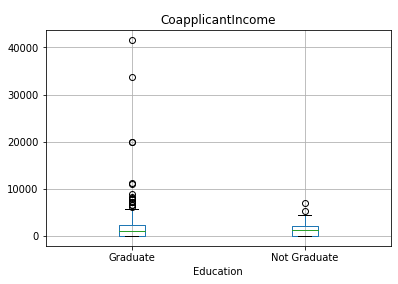

In [239]:
data.boxplot(column='CoapplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

Here also majority of our outliers are those who are Graduates.

### 11. Loan Amount


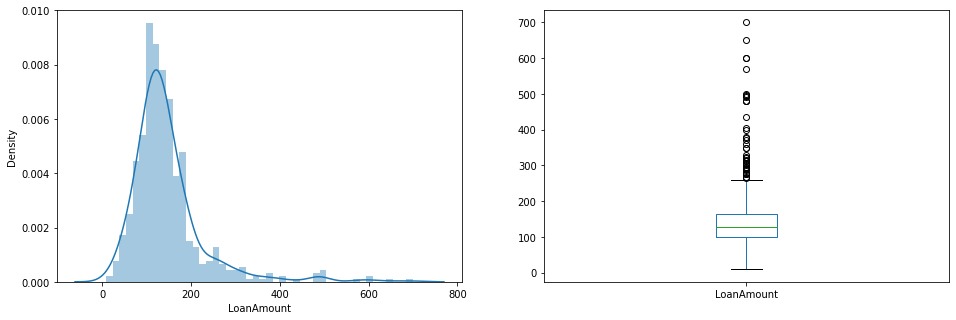

In [240]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['LoanAmount']);

plt.subplot(122)
data['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

The distribution of the Loan Amount shows that most of the applications have loan amounts between the range (0 – 250) K.

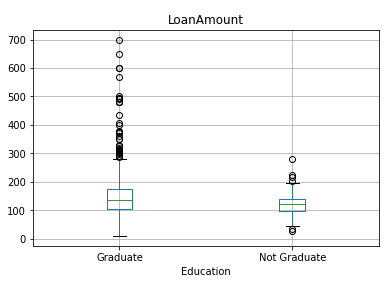

In [241]:
data.boxplot(column='LoanAmount',by="Education" )
plt.suptitle(" ")
plt.show()

Similar to the applicant income and co-applicant income, most Loan amount outliers are from Graduate section. These must be those applicants who have higher salary and are graduates. 

### 12. Loan Amount Term

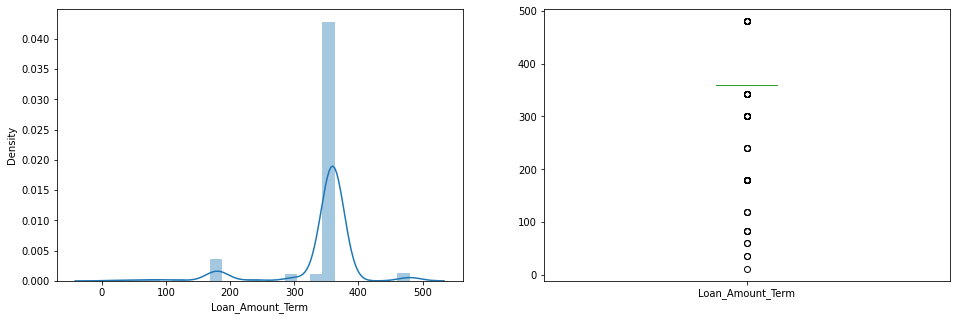

In [242]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data["Loan_Amount_Term"]);

plt.subplot(122)
data["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

From the above distribution we can conclude that the loan amount term seems to be a categorical column.
We will now plot the countplot of our loan amount term.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

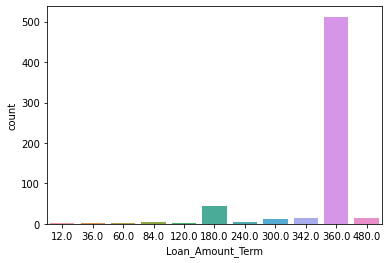

In [243]:
sns.countplot(x = data['Loan_Amount_Term'])

The above plot shows that most of the loan applicants have applied the loan for 360 months duration.

## Bivariate Analysis
In case of bivariate analysis we explore the possible relationship that may exist between two variables. Here we will compare each variable from our dataset with the target variable.

First we will create a function for normalized bar chart to plot the normalized chart of each columns in comparison to laon status.

In [244]:

# function to compare a specific column with Loan Status using normalized bar chart
def norm_bar_chart(col):
    Total_Income = pd.crosstab(data[col],data["Loan_Status"])
    Total_Income.div(Total_Income.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,4))
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.show()
    


### 1. "Loan_Status" and "Gender"

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


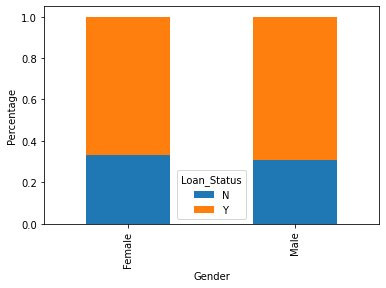

In [245]:
# crosstab () function is used to compute a simple cross tabulation of two (or more) factors.
print(pd.crosstab(data["Gender"],data["Loan_Status"]))

# to plot the normalized bar plot using the preious created function.
norm_bar_chart("Gender")

After comparing the data, it shows that number of loans approved for females is 75 and for males, it is 339. There is a large differenced in the result since most of the applicants are male but for both the genders the approval percentage is almost similar.


### 2. "Loan_Status" and "Married"

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


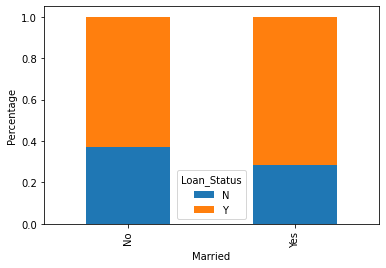

In [246]:
print(pd.crosstab(data["Married"],data["Loan_Status"]))
norm_bar_chart("Married")

Around 63% of loans are approved for applicants who are not married. And for married applicants, the approval percentage is 71.8%. It is clearly visible that for married applicants the loan approval proportion is higher than for single applicants.


### 3. "Loan_Status" and "Dependents"

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33


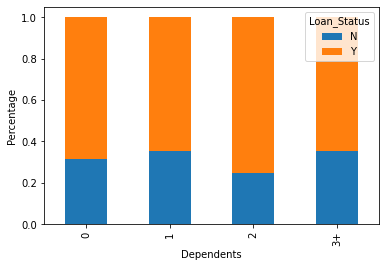

In [247]:
print(pd.crosstab(data["Dependents"],data["Loan_Status"]))
norm_bar_chart("Dependents")

From the above plot, we can see that the distribution of the number of dependents from 0 to 3+.


### 4. "Loan_Status" and "Education"

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


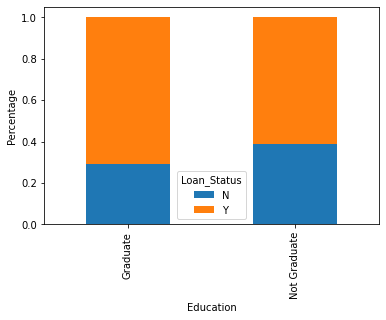

In [248]:
print(pd.crosstab(data["Education"],data["Loan_Status"]))
norm_bar_chart("Education")

Using the normalized bar chart we can see that the applicants which are graduates have a higher loan approval proportion as compared to non-graduate applicants. For graduates, the loan approval percentage is approx. 71% and for applicants who are not graduates it is only 61 %.


### 5. "Loan_Status" and "Self_Employed"

Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


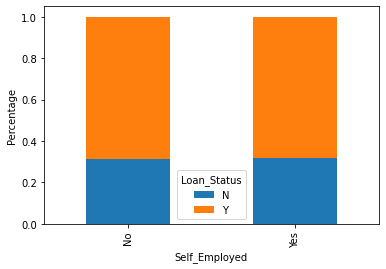

In [249]:
print(pd.crosstab(data["Self_Employed"],data["Loan_Status"]))
norm_bar_chart("Self_Employed")

There is nothing significant in this since the approval proportion is approximately similar for self-employed and salaried persons.


### 6. "Loan_Status" and "Credit_History"

Loan_Status       N    Y
Credit_History          
0.0              82    7
1.0             110  415


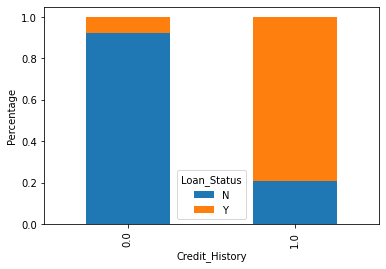

In [250]:
print(pd.crosstab(data["Credit_History"],data["Loan_Status"]))
norm_bar_chart("Credit_History")

It is completely visible from the normalized bar chart that those applicants who have a bad credit history have a lower approval percentage.


### 7. "Loan_Status" and "Property_Area"

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


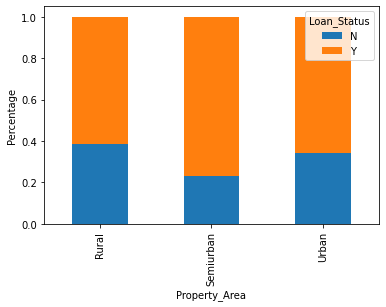

In [251]:
print(pd.crosstab(data["Property_Area"],data["Loan_Status"]))
norm_bar_chart("Property_Area")

Here also there is nothing significant from the normalized plot of loan status and the property area.


### 8. "Loan_Status" and "Applicant Income"

In [252]:
data.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

To check the relation between the applicant’s income and loan status, we have created 4 bins as per the distribution of the Applicant’s income. 

In [253]:
bins =[0,2000,4000,6000,81000]
group=['Low','Average','High','Very High']
data["Applicant_Income_bin"]=pd.cut(data["ApplicantIncome"], bins, labels=group)

In [254]:
print(pd.crosstab(data["Applicant_Income_bin"],data["Loan_Status"]))

Loan_Status            N    Y
Applicant_Income_bin         
Low                   16   25
Average               85  208
High                  45   98
Very High             46   91


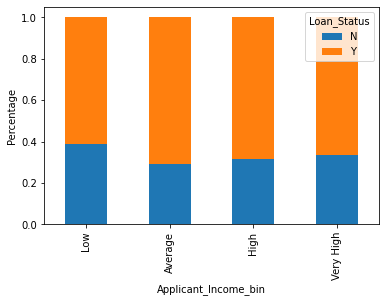

In [255]:
norm_bar_chart("Applicant_Income_bin")

From the normalized bar graph created using these bins, we can see that applicants having low income have fewer approval percentages as compared to others.


### 9. "Loan_Status" and "Co-Applicant Income"

In [256]:
data.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [257]:
bins =[0,1000,2000,3000,42000]
group=['Low','Average','High','Very High']
data["Coapplicant_Income_bin"]=pd.cut(data["CoapplicantIncome"], bins, labels=group)

In [258]:
print(pd.crosstab(data["Coapplicant_Income_bin"],data["Loan_Status"]))

Loan_Status              N   Y
Coapplicant_Income_bin        
Low                      3  19
Average                 35  87
High                    26  74
Very High               32  65


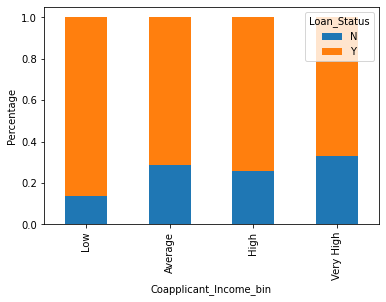

In [259]:
norm_bar_chart("Coapplicant_Income_bin")

From this normalized bar plot, we can infer that applications, where the co-applicant income is low, have a higher approval ratio which seems contradictory. It might be since most of the applicants do not have a co-applicant.

To solve the contradiction with the co-applicant income we will introduce a new variable total income which will combine both the incomes of the applicant and co-applicant. 

It is also termed as feature engineering which in short is to create additional features that are better at representing pre-defined variables.

We will further infer the result of the Total Income variable with the loan status.


### 10. "Loan_Status" and " Total Income"

In [260]:
# First combining both the Appicant Income and Coapplicant income to show total income
# Based on the domain knowledge, we can come up with new features that might affect the target variable and it is known as feature engineering
data["Total_Income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]

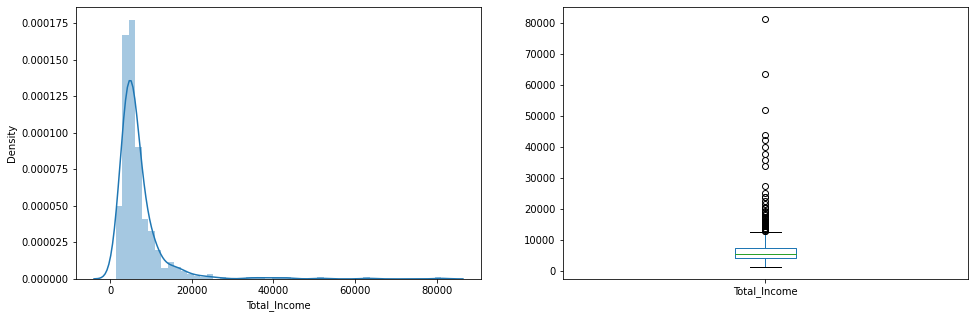

In [261]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data["Total_Income"]);

plt.subplot(122)
data["Total_Income"].plot.box(figsize=(16,5))
plt.show()


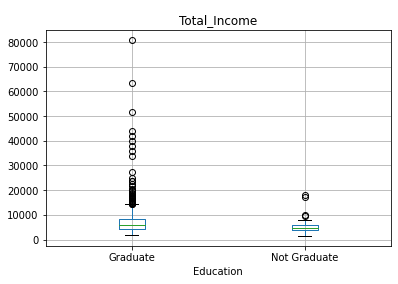

In [262]:
data.boxplot(column='Total_Income',by="Education" )
plt.suptitle(" ")
plt.show()

As shown in the univriative analysis section both the applicant income and co-applicant has outliers and majority of them were Graduate applicants. We can see a similar trend in the Total Income boxplot.

In [263]:
data.Total_Income.describe()   # decription of Total Income column to create bins

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64

In [264]:
bins =[0,2000,4000,6000,81000]
group=['Low','Average','High','Very High']
data["Total_Income_bin"]=pd.cut(data["Total_Income"], bins, labels=group)

In [265]:
print(pd.crosstab(data["Total_Income_bin"],data["Loan_Status"]))

Loan_Status        N    Y
Total_Income_bin         
Low                5    1
Average           41   96
High              65  159
Very High         81  166


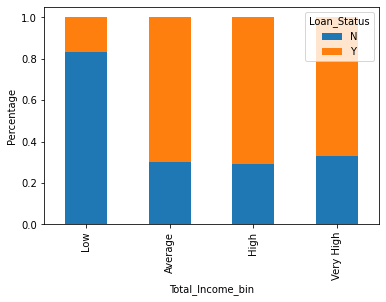

In [266]:
norm_bar_chart("Total_Income_bin")

We can see that the proportion of approved loans is very less for the applicants who have a low income as compared to Average or high-income applicants. 
It is pretty much justifiable and seems right as compared to the applicant income and co-applicant income normalized bar charts. 


### 11. "Loan_Status" and "Loan Amount"

In [267]:
data.LoanAmount.describe()   # decription of Total Income column to create bins

count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [268]:
bins = [0,100,300,700]
group=['Low','Average','High']
data["LoanAmount_bin"]=pd.cut(data["LoanAmount"],bins,labels=group)

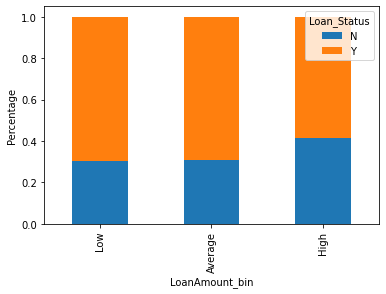

In [269]:
norm_bar_chart("LoanAmount_bin")

Applications with lesser loan amounts have a much high approval ratio as compared to applications with a high loan amount.


### 12."Loan_Status" and "Loan Amount Term"

In [270]:
data.Loan_Amount_Term.describe()

count    614.000000
mean     342.000000
std       64.372489
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [271]:
bins = [0,400,500]
group=['Low','High']
data["LoanAmountTerm_bin"]=pd.cut(data["Loan_Amount_Term"],bins,labels=group)

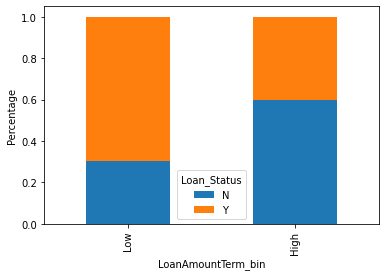

In [272]:
norm_bar_chart("LoanAmountTerm_bin")

From the above plot, we can see that applications with high loan terms have a low approval percentage.

##### Now we will drop the bins which we created for the exploration part .

In [273]:
data=data.drop(["Applicant_Income_bin","Coapplicant_Income_bin","LoanAmount_bin","Total_Income_bin","LoanAmountTerm_bin"],axis=1)

# Data Normalization and Outlier treatment.
From EDA we have analyzed that the outliers are reasonable, as it seems to be due to the applicants who have high income and are Graduates.

In Data Normalization we make the data fall within a smaller or common range, for e.g. [-1,1].

Further in EDA we have introduced a new variable “Total Income” which replaced two of the previous variables “Applicant Income” and “Co-applicant Income”, so we only need to normalize the "Total Income" and "Loan Amount". 


### 1. Total Income

<AxesSubplot:>

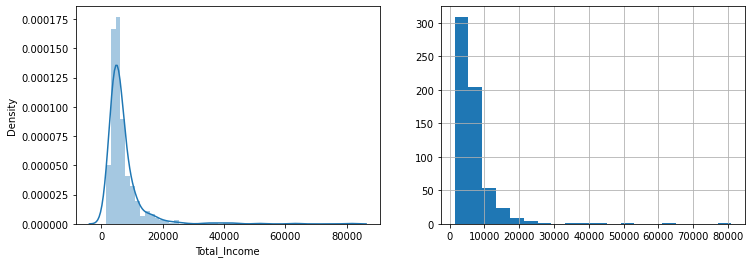

In [274]:
plt.figure(figsize= (12,4))

plt.subplot(1,2,1)
sns.distplot(data["Total_Income"])
plt.subplot(1,2,2)
data['Total_Income'].hist(bins=20)


From the plot of total income bulk of the data lies on the left side of the plot which is known as right skewness. It is due to the presence of the outlier values which seems to be due to graduate applicants who have a higher salary as discussed previously in EDA.
There are a number of ways to normalize the data, but we will be using log-transformation here.


In [275]:

# TREATING OUTLIERS USING LOG
data['Total_Income_log'] = np.log(data['Total_Income'])


<AxesSubplot:>

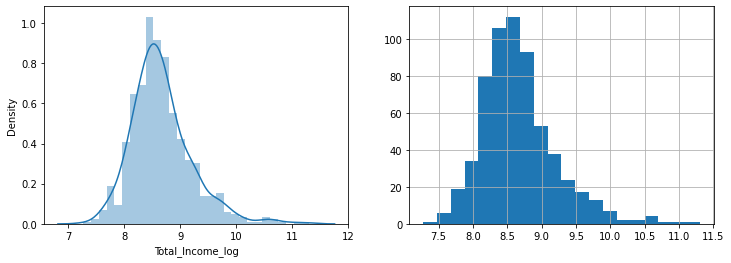

In [276]:
# Checking the distribution of data after outlier treatment

plt.figure(figsize= (12,4))

plt.subplot(1,2,1)
sns.distplot(data["Total_Income_log"])
plt.subplot(1,2,2)
data['Total_Income_log'].hist(bins=20)


After transforming the data using log transformation, we can see from the log distribution of total income that the skewness is reduced. Log transformation does not affect smaller values much but reduces the larger values. 


### 2. Loan Amount

<AxesSubplot:>

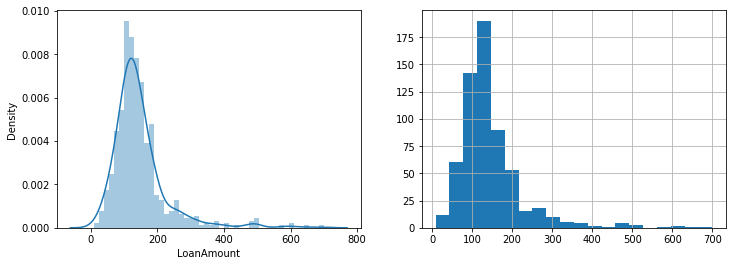

In [277]:
plt.figure(figsize= (12,4))

plt.subplot(1,2,1)
sns.distplot(data["LoanAmount"])
plt.subplot(1,2,2)
data['LoanAmount'].hist(bins=20)


Similar to Total Income we will normalize the loan amount so the system can assign equal weightage to it. From the loan amount distribution, it is visible that the data is right-skewed. We will then again use the log transformation to reduce the skewness of Loan Amount data distribution.      

In [278]:
# TREATING OUTLIERS USING LOG
data['LoanAmount_log'] = np.log(data['LoanAmount'])


<AxesSubplot:>

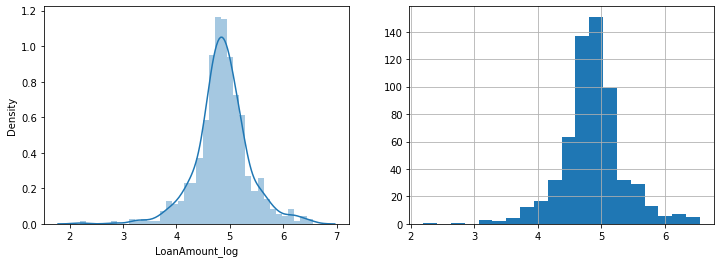

In [279]:
# Checking the distribution of data after outlier treatment

plt.figure(figsize= (12,4))

plt.subplot(1,2,1)
sns.distplot(data["LoanAmount_log"])
plt.subplot(1,2,2)
data['LoanAmount_log'].hist(bins=20)


After performing log normalization, the skewness is also reduced for the Loan Amount.

#### Let us now drop the variables which we used to create these new normalized features LoanAmount_log and Total_Income_log

In [280]:
data=data.drop(["LoanAmount","Total_Income"],axis=1)

In [281]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income_log,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y,8.674026,4.986426
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N,8.714568,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y,8.006368,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y,8.505323,4.787492
4,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y,8.699515,4.948760


## Encoding categorical data to numeric data
Most of the machine learning algorithms only allow features in a numerical format which means that it can only be integer, float, decimal, etc, however, the strings or characters are not supported.

So we need to convert or encode the categorical data into numerical data so our machine learning algorithm can interpret them correctly.

Since we have dropped the loan ID we only need to encode the remaining six categorical variables which are mentioned below.

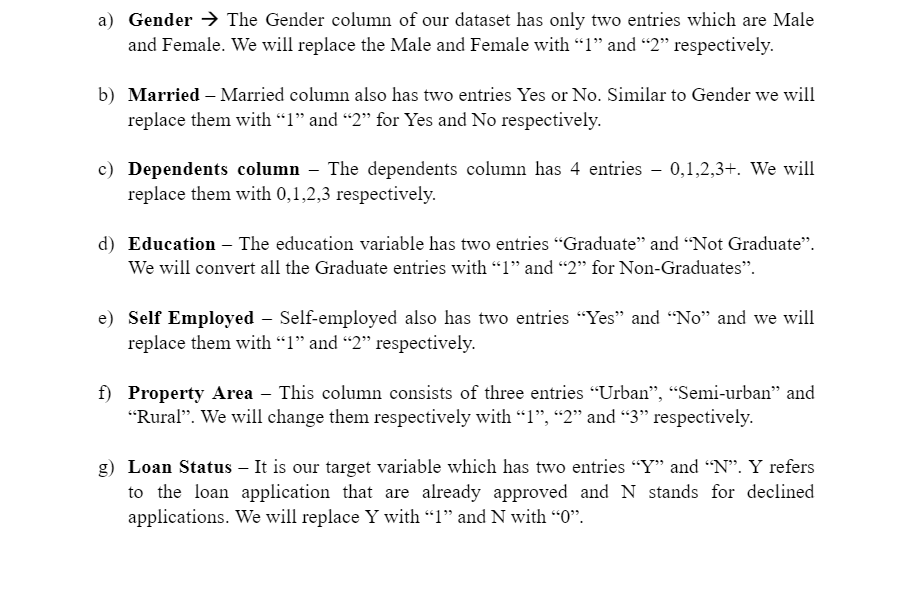

In [282]:
# Head of the data before encoding.
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income_log,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y,8.674026,4.986426
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N,8.714568,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y,8.006368,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y,8.505323,4.787492
4,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y,8.699515,4.948760


In [283]:
# Encoding the categorical variables.


# Gender
data['Gender'].replace(('Male', 'Female'), (1, 2) ,inplace=True)

# Married
data['Married'].replace(('Yes','No'), (1, 2),inplace=True)

# For dependents column
data['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)

# Education
data['Education'].replace(('Graduate', 'Not Graduate'), (1, 2),inplace=True)

# Self Employed
data['Self_Employed'].replace(('Yes','No'), (1, 2),inplace=True)

# Property Area
data['Property_Area'].replace(('Urban','Semiurban','Rural'), (1, 2, 3),inplace=True)

# For Loan Status
data['Loan_Status'].replace(('N', 'Y'), (0, 1),inplace=True)

In [284]:
# Head of the data after normalization.
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income_log,LoanAmount_log
0,1,2,0,1,2,5849,0.0,360.0,1.0,1,1,8.674026,4.986426
1,1,1,1,1,2,4583,1508.0,360.0,1.0,3,0,8.714568,4.852030
2,1,1,0,1,1,3000,0.0,360.0,1.0,1,1,8.006368,4.189655
3,1,1,0,2,2,2583,2358.0,360.0,1.0,1,1,8.505323,4.787492
4,1,2,0,1,2,6000,0.0,360.0,1.0,1,1,8.699515,4.948760


In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Total_Income_log   614 non-null    float64
 12  LoanAmount_log     614 non-null    float64
dtypes: float64(5), int64(8)
memory usage: 62.5 KB


From the column description as shown above we can infer that all the columns are now integer or in float datatype after encoding them. 
The columns Gender, Married, Dependents, Education, Self-Employed, Applicant Income, Property Area, and Loan Status are in integer datatype and the remaining five columns Co-Applicant Income, Loan Amount Term, Credit History, Total Income log, and Loan Amount log are in the float datatype.


In [286]:
# ALso Let us drop the Appicant Income and CoApplicant Income since we have created total income using them
data=data.drop(["ApplicantIncome","CoapplicantIncome"],axis=1)

## Correlation between the numerical variables using heatmap
In the next step we will check the correlation between each variables. It helps us in observing variables that may have high correlation. 

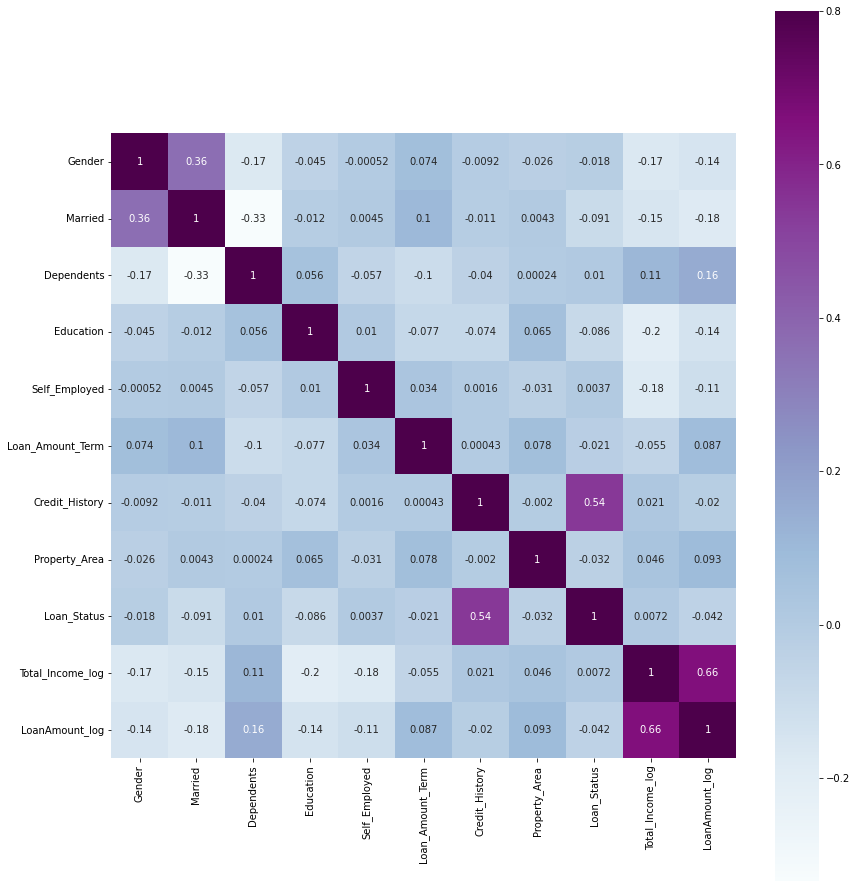

In [287]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(14, 16))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

-

## Test Train data split
Before moving onto the model building process, we will split our data into train and test dataset. Machine learning algorithin learns from the data provided by finding relations, and understanding by using the training data. The performance of the model completely depends upon the train data that has been provided.

Once we have trained the machine learning model using the training dataset, we will then evaluate the model using the test dataset. The Test dataset can be obtained from a separated source or we can simply divide our original dataset into two parts train and test. Before proceeding with this step, we must remember that our model should not be overfit or underfit.

The most ideal split ratio is considered to be 80% for the training set and 20% for the test set to avoid overfitting and underfitting.

In [288]:
# X (input variables) and Y (Target Variable) from the dataset.
X = data.drop("Loan_Status",1)
Y = data["Loan_Status"]

 Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.

In [289]:
# splitting for train and test dataset (80:20 ratio)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle = True, random_state=2)



In [290]:
print("X_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


X_train shape: (491, 10)
y_train shape: (491,)
X_test shape: (123, 10)
y_test shape: (123,)


# Model Building :
For our model building process, we will be working on classification techniques since our output is discrete and has only two outcomes whether the loan will be approved or not. We will then use these 4 classification algorithms which are– Logistic regression, Random Forest, Decision Tree, and Naïve Bayesian.


### 1. Logistic Regression
 This regression technique is widely used to predict outcomes that are binary using a given set of variables that are independent to each other. 
Logistic regression measures the probability of a categorical dependent variable using given set of independent variables.

It is similar to linear regression but here rather than fitting the regression line, we fit an "S" shaped function which further predicts the maximum likelihood value which may be 0 or 1.

In [291]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [292]:
logistic_model = LogisticRegression()

In [293]:
# fitting the model using the train dataset.
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [294]:
# accuracy checking with test dataset 
logistic_model.score(x_test,y_test)*100

77.23577235772358

In [295]:
# accuracy of model with train dataset
logistic_model.score(x_train,y_train)*100

81.87372708757637

Since the training set accuracy is slightly higher than the test set accuracy which shows that the model is not underfit or overfit.

But we cannot be certain it is not biased. To check how robust is our model to unseen data, we will use the cross-validation method.  

“Cross-validation is a technique in which the training dataset is split into the required number of folds.” For example, let us consider 5 folds, the data is then fit on four folds and scored on the fifth fold.This process is iterated over 5 times. At last, we can check the average score from the 5 different scores obtained at each fold.  

#### Logistic Regression accuracy using  cross-validation method


In [296]:
from sklearn.model_selection import cross_val_score,cross_val_predict
scores = cross_val_score(logistic_model,x_train,y_train,cv = 5)
print(scores)
print("Avg. accuracy of Logistic model with Cross Validation is:",scores.mean() * 100)

[0.81818182 0.84693878 0.80612245 0.83673469 0.7755102 ]
Avg. accuracy of Logistic model with Cross Validation is: 81.66975881261595


From the above cross validation method we can see that the model has a good average accuracy.

#### Grid search for optimized parameters in logistic regression
Finally we will use the Grid Search to obtain the optimized hyperparameters for our best fit model. "Hyperparameter tuning refers to shaping the model from availale space". Or we can say it is the process of finding the best parameters to obtain high accuract and precision.

For logistic regression, we need to evaluate two of the parameters that are “C” and “penalty”.


In [298]:
# Gridsearch cross validation combines both grid search and cross validation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler



In [299]:
# Pipeline will helps us by passing modules one by one through GridSearchCV for which we want to get the best parameters.

pipe = Pipeline(steps=[('logistic_model', logistic_model)])


In [300]:
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2','elasticnet', 'none']

In [301]:
# Now we are creating a dictionary to set all the parameters options for different modules.
parameters = dict(logistic_model__C=C,
                      logistic_model__penalty=penalty)

In [302]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('logistic_model',
                                        LogisticRegression())]),
             param_grid={'logistic_model__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.811...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic_model__penalty': ['l1', 'l2', 'elasticnet',
                                                     'none']})

In [303]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_model__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_model__C'])
print(clf_GS.best_estimator_.get_params()['logistic_model'])


Best Penalty: l2
Best C: 0.12648552168552957
LogisticRegression(C=0.12648552168552957)


In [304]:
# Logistic model with best parameters
best_logistic_model = LogisticRegression(C=0.12648552168552957,penalty='l2')

In [305]:
best_logistic_model.fit(x_train,y_train)

LogisticRegression(C=0.12648552168552957)

In [306]:
# accuracy checking with test dataset   with best parameters
best_logistic_model.score(x_test,y_test)*100

77.23577235772358

In [307]:
# accuracy checking with train dataset   with best parameters
logistic_model.score(x_train,y_train)*100

81.87372708757637

Next we will draw the ROC curve ("which is a probability curve that represents the degree of measure of separability") and check AUC ("Area Under Curve"). It is the plot drawn between True Positive Rate and False positive rate. The higher the AUC value or the closer it is to 1, the better is our model at predicting.

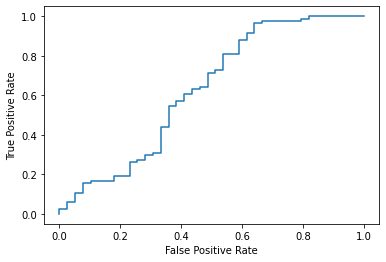

AUC=0.6282051282051282


In [308]:

# Plot the ROC Curve
#define metrics
y_pred_proba = best_logistic_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC value of data
label="AUC="+ str(auc)
print(label)

Finally we will draw the confusion matrix of the final result.

In [309]:
# model prediction
pred_xtest_logistic=best_logistic_model.predict(x_test)

Confusion Matrix on test Data
Predicted   0    1  All
True                   
0          13   26   39
1           2   82   84
All        15  108  123


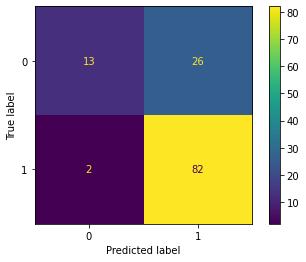

In [310]:
print("Confusion Matrix on test Data")
print(pd.crosstab(y_test, pred_xtest_logistic, rownames=['True'], colnames=['Predicted'], margins=True))

plot_confusion_matrix(best_logistic_model,x_test,y_test)


### 2.  Decision Tree Classifier
“Decision Tree is a tree-structured classifier where the internal node represents the features of the dataset”.

The decision tree starts from the root node and expands on further branches until the leaf node is reached and it constructs a tree-like structure. A decision tree basically asks a question and then divides the tree into more subtrees based on the outcome of the answer, whether yes or no. The parent node is also known as the root node, whereas the remaining nodes are known as child nodes.

The best attribute for the root or the sub-nodes is selected using the technique which is called Attribute Selection measure (ASM). "Information Gain" and "Gini Index" are the most widely utilised ASM approaches.


In [311]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=1)

In [313]:
# fitting the model on train dataset
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [314]:
pred_xtest_tree=tree_model.predict(x_test)

In [316]:
# checking the accuracy with the predicted value and the original value on test dataset.
accuracy_score(pred_xtest_tree,y_test)*100 

68.29268292682927

#### Accuracy with cross validation method for descision tree

In [317]:
scores = cross_val_score(tree_model,x_train,y_train,cv = 5)
print(scores)
#get the mean of each fold 
print("Accuracy of decision tree model with Cross Validation is:",scores.mean() * 100)

[0.70707071 0.75510204 0.65306122 0.75510204 0.70408163]
Accuracy of decision tree model with Cross Validation is: 71.48835291692434


#### Grid search CV for optimized parameter in decision tree model

In [318]:
pipe = Pipeline(steps=[('tree_model', tree_model)])

In [319]:
# DecisionTreeClassifier requires two parameters 'criterion' and 'max_depth' to be optimised by GridSearchCV. 
# So we have set these two parameters as a list of values form which GridSearchCV will select the best value of parameter.
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(tree_model__criterion=criterion,
                      tree_model__max_depth=max_depth)

In [320]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tree_model',
                                        DecisionTreeClassifier(random_state=1))]),
             param_grid={'tree_model__criterion': ['gini', 'entropy'],
                         'tree_model__max_depth': [2, 4, 6, 8, 10, 12]})

In [321]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['tree_model__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['tree_model__max_depth'])
print(); print(clf_GS.best_estimator_.get_params()['tree_model'])

Best Criterion: gini
Best max_depth: 2

DecisionTreeClassifier(max_depth=2, random_state=1)


In [322]:
# Fitting the Decision Tree best fit model with optimized parameters
best_tree_model = DecisionTreeClassifier(criterion="gini", max_depth= 2,random_state=1)


In [323]:
# Training the best fit model
best_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [324]:
# accuracy checking with test dataset  with best parameters
best_tree_model.score(x_test,y_test)*100

75.60975609756098

In [325]:
# accuracy checking with train dataset   with best parameters
best_tree_model.score(x_train,y_train)*100

83.09572301425662

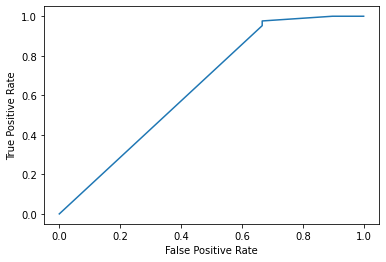

AUC=0.6480463980463981


In [327]:

# Plot the ROC Curve
#define metrics
y_pred_proba = best_tree_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC value of data
label="AUC="+ str(auc)
print(label)

Confusion Matrix on test Data
Predicted   0    1  All
True                   
0          13   26   39
1           4   80   84
All        17  106  123


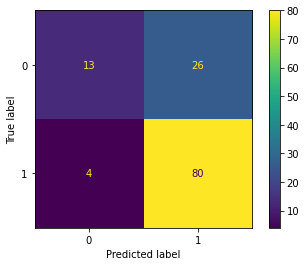

In [328]:
# model prediction
pred_tree_model=best_tree_model.predict(x_test)
print("Confusion Matrix on test Data")
print(pd.crosstab(y_test, pred_tree_model, rownames=['True'], colnames=['Predicted'], margins=True))

plot_confusion_matrix(best_tree_model,x_test,y_test)


### 3. Random Forest
“It consists of multiple decision trees which are similar to a forest that has many trees in it".

It uses randomness to increase the accuracy and to cure overfitting which is generally a measure issue for sophisticated algorithms. It makes decision trees based on a random selection of the data samples and predict the result from each of the trees. Finally it selects the best available solutio through votes.

In [329]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1)

In [330]:
# Fitting the model using train set
forest_model.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [331]:
pred_xtest_forest=forest_model.predict(x_test)

In [333]:
# accuracy with test dataset
accuracy_score(pred_xtest_forest,y_test)*100 

72.35772357723577

#### Accuracy with cross validation method for random forest

In [334]:
scores = cross_val_score(forest_model,x_train,y_train,cv = 5)
print(scores)
#get the mean of each fold 
print("Accuracy of Random forest model with Cross Validation is:",scores.mean() * 100)

[0.83838384 0.83673469 0.81632653 0.85714286 0.73469388]
Accuracy of Random forest model with Cross Validation is: 81.66563595135024


#### Grid search CV for optimized parameter in Random Forest  model

In [335]:
pipe = Pipeline(steps=[('forest_model', forest_model)])

In [336]:
# In Random Forest we need to optimize 4 parameters- criterion, max_depth, n_estimators and max_features

criterion = ['gini', 'entropy']
max_depth = [4,5,6,7,8,10,12]
n_estimators = [50, 500]
max_features =  ['auto', 'sqrt', 'log2']
parameters = dict(forest_model__criterion=criterion,
                      forest_model__max_depth=max_depth,
                        forest_model__n_estimators = n_estimators,
                            forest_model__max_features = max_features)

In [337]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('forest_model',
                                        RandomForestClassifier(random_state=1))]),
             param_grid={'forest_model__criterion': ['gini', 'entropy'],
                         'forest_model__max_depth': [4, 5, 6, 7, 8, 10, 12],
                         'forest_model__max_features': ['auto', 'sqrt', 'log2'],
                         'forest_model__n_estimators': [50, 500]})

In [338]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['forest_model__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['forest_model__max_depth'])
print('Best n_estimators:', clf_GS.best_estimator_.get_params()['forest_model__n_estimators'])
print('Best max_features:', clf_GS.best_estimator_.get_params()['forest_model__max_features'])

print(); print(clf_GS.best_estimator_.get_params()['forest_model'])

Best Criterion: gini
Best max_depth: 4
Best n_estimators: 500
Best max_features: auto

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=1)


In [339]:
# Random forest model with best parameters
best_forest_model = RandomForestClassifier(criterion='gini', max_depth=4, 
                                           n_estimators=500,max_features= "auto",
                                           random_state=1)


In [340]:
# Fitting the model with best fit parameters.
best_forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=1)

In [341]:
# accuracy checking with test dataset  with best parameters
best_forest_model.score(x_test,y_test)*100

74.79674796747967

In [342]:
# accuracy checking with train dataset   with best parameters
best_forest_model.score(x_train,y_train)*100

84.11405295315683

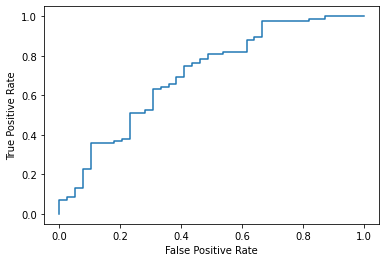

AUC=0.7048229548229548


In [343]:
# Plot the ROC Curve
#define metrics
y_pred_proba = best_forest_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC value of data
label="AUC="+ str(auc)
print(label)

Confusion Matrix on test Data
Predicted   0    1  All
True                   
0          13   26   39
1           5   79   84
All        18  105  123


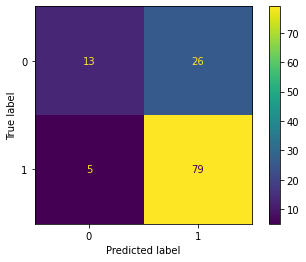

In [344]:
# model prediction
pred_forest_model=best_forest_model.predict(x_test)
print("Confusion Matrix on test Data")
print(pd.crosstab(y_test, pred_forest_model, rownames=['True'], colnames=['Predicted'], margins=True))

plot_confusion_matrix(best_forest_model,x_test,y_test)

### 4. Naive baye's classifier
It is a classification technique that works on the principle of Bayes theorem. The Nave Bayes classifier implies that the existence of one characteristic in a class is unrelated to the presence of any other feature in that class, or that X's are unrelated to one another.

In [345]:
from sklearn.naive_bayes import GaussianNB 

gNB = GaussianNB() 
gNB.fit(x_train, y_train) 


GaussianNB()

In [346]:
pred_gNB = gNB.predict(x_test)

In [347]:
# checking the accuracy with test dataset
accuracy_score(pred_gNB,y_test)*100 

76.42276422764228

#### accuracy with cross validation method for naive bayesian

In [348]:
scores = cross_val_score(gNB,x_train,y_train,cv = 5)
print(scores)
#get the mean of each fold 
print("Accuracy of Random forest model with Cross Validation is:",scores.mean() * 100)

[0.7979798  0.83673469 0.81632653 0.80612245 0.78571429]
Accuracy of Random forest model with Cross Validation is: 80.85755514326945


#### Grid search CV for optimized parameter in naive bayesian

In [349]:
pipe = Pipeline(steps=[('gNB', gNB)])

In [352]:
# In Naive Bayes we only need to optimize the var_smoothing parameter.
var_smoothing = np.logspace(0,-9, num=100)
parameters = dict(gNB__var_smoothing=var_smoothing)

In [351]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('gNB', GaussianNB())]),
             param_grid={'gNB__var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.511191...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [353]:
print('Best var_smoothing:', clf_GS.best_estimator_.get_params()['gNB__var_smoothing'])

print(); print(clf_GS.best_estimator_.get_params()['gNB'])

Best var_smoothing: 3.5111917342151277e-07

GaussianNB(var_smoothing=3.5111917342151277e-07)


In [354]:
var_smooth = clf_GS.best_estimator_.get_params()['gNB__var_smoothing']
print(var_smooth)

3.5111917342151277e-07


In [355]:
# Naive bayes with best parameters
best_gNB = GaussianNB(var_smoothing=var_smooth)


In [356]:
best_gNB.fit(x_train,y_train)

GaussianNB(var_smoothing=3.5111917342151277e-07)

In [357]:
# accuracy checking with test dataset  with best parameters
best_gNB.score(x_test,y_test)*100

76.42276422764228

In [358]:
# accuracy checking with train dataset   with best parameters
best_gNB.score(x_train,y_train)*100

81.87372708757637

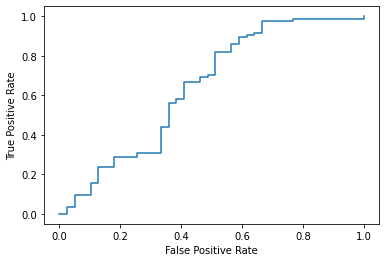

AUC=0.6401098901098902


In [359]:
# Plot the ROC Curve
#define metrics
y_pred_proba = best_gNB.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC value of data
label="AUC="+ str(auc)
print(label)

Confusion Matrix on test Data
Predicted   0    1  All
True                   
0          13   26   39
1           5   79   84
All        18  105  123


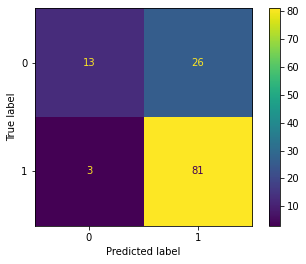

In [360]:
# model prediction
pred_gNB =best_forest_model.predict(x_test)
print("Confusion Matrix on test Data")
print(pd.crosstab(y_test, pred_gNB, rownames=['True'], colnames=['Predicted'], margins=True))

plot_confusion_matrix(best_gNB,x_test,y_test)

### Final Model Comparison table using Excel for better view
Since we have created different models above using 4 different classification techniques, we will compare them to select the model with the best prediction results. 

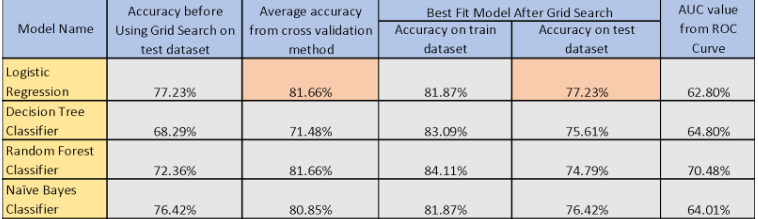

From the above table we can conclude that Logistic Regression is the best fit model for prediction since it has highest accuracy on the test dataset using the best parameters from Grid Search. It also has the best average accuracy from Cross- Validation method.

## IMPORTANT FEATURES
This function shows the weightage assigned to each variable in our model.

Our final model is Logistic Regression but the Logistic regression does not have the feature importances attribute. So, we will select the next model with the highest accuracy.

Here we have used the RandomForest model to check the importance of each variable in this model.

<AxesSubplot:>

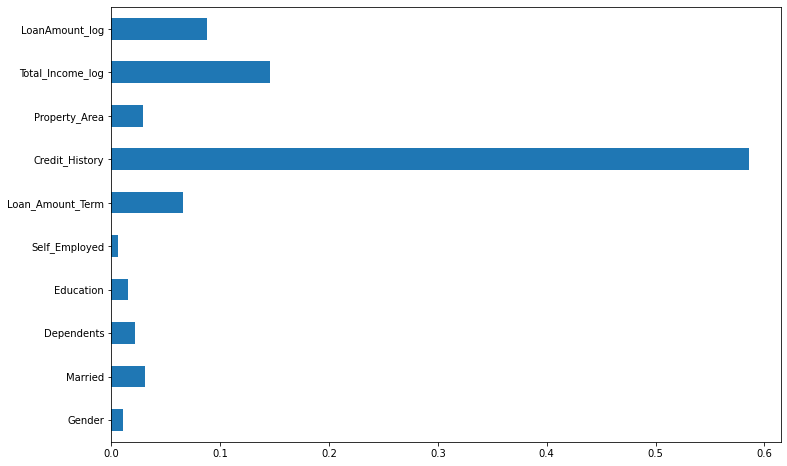

In [362]:
importances=pd.Series(best_forest_model.feature_importances_, index=X.columns)
importances.plot(kind="barh", figsize=(12,8))

From the above plot we can conclude that Credit History has the most impact on the target variable followed by "Total_Income", "Loan_Amount" and "Loan_Amount_Term". 